First of all, let's import necessary libraries/packages we are going to work with.

In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()

 Now, let's load the data and make a copy of it, in case we need it again.

In [59]:
raw_csv_data = pd.read_csv('Index2018.csv')

In [60]:
df_complete = raw_csv_data.copy()

Now it's time to explore the data and see some statistics. We call this Exploratory Data Analysis (EDA).

Let's see the first five rows of the data.

In [61]:
df_complete.head()

,date,spx,dax,ftse,nikkei
0,07/01/1994,469.90,2224.95,3445.98,18124.01
1,10/01/1994,475.27,2225.00,3440.58,18443.44
2,11/01/1994,474.13,2228.10,3413.77,18485.25
3,12/01/1994,474.17,2182.06,3372.02,18793.88
4,13/01/1994,472.47,2142.37,3360.01,18577.26


A time series dataset must be indexed by a date column. We are going to do this later on. The other four columns represents Market indexes respectively in USA(spx), Germany(dax), UK(ftse), and Japan(nikkei).

Now let's get some statistics from the data.

In [62]:
df_complete.describe()

,spx,dax,ftse,nikkei
count,6269.000000,6269.000000,6269.000000,6269.000000
mean,1288.127542,6080.063363,5422.713545,14597.055700
std,487.586473,2754.361032,1145.572428,4043.122953
min,438.920000,1911.700000,2876.600000,7054.980000
25%,990.671905,4069.350000,4486.100000,10709.290000
50%,1233.420000,5773.340000,5662.430000,15028.170000
75%,1459.987747,7443.070000,6304.250000,17860.470000
max,2872.867839,13559.600000,7778.637689,24124.150000


The first line shows that all columns have values, meaning no missing data. Good for us. We can also see that spx mean is almost 4.5 times less than the second one (ftse). So, we can infer many important information from this table.

In order to double check about missing data, we can also use another command.

In [63]:
df_complete.isna().sum()

date      0
spx       0
dax       0
ftse      0
nikkei    0
dtype: int64

Notice that all columns have no null values.

Now let's plot the data and take an wide view of it.

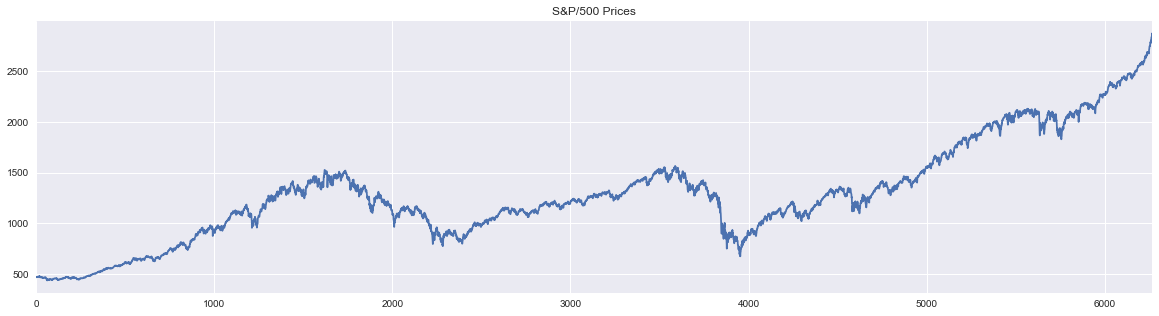

In [64]:
plt.figure(figsize=(20,5))
df_complete.spx.plot(title='S&P/500 Prices')

The x (horizontal) axis represents the period in numbers. As I said before, later on we will change for respective dates. We can see that there were peaks, meaning grown, and falls, meaning decrease in the stock prices. Below, we are going to plot remaining indexes. 

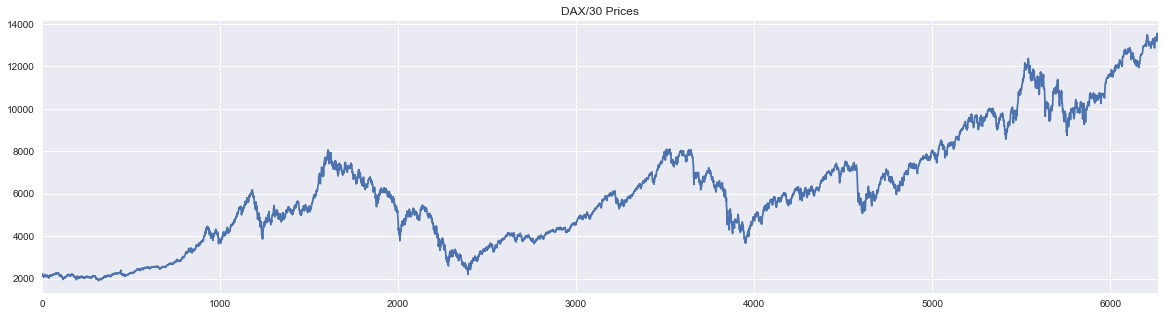

In [65]:
plt.figure(figsize=(20,5))
df_complete.dax.plot(title='DAX/30 Prices')

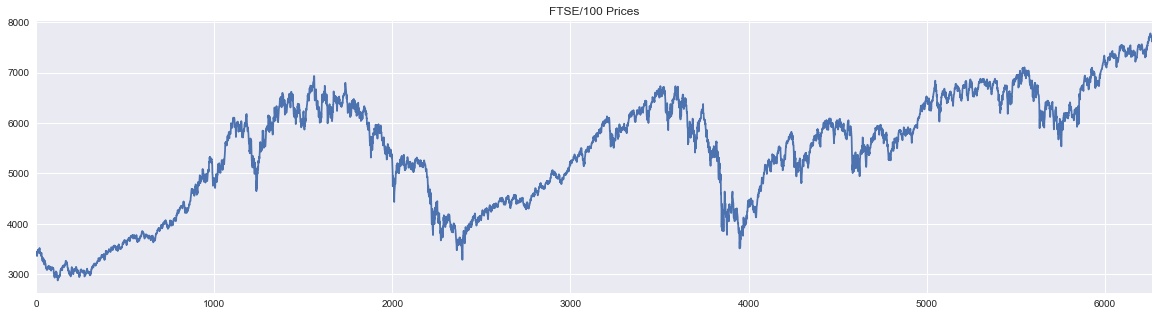

In [66]:
plt.figure(figsize=(20,5))
df_complete.ftse.plot(title='FTSE/100 Prices')

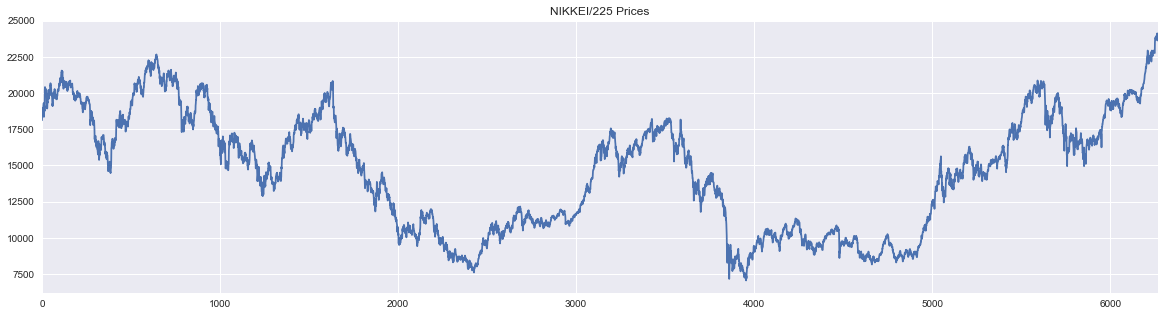

In [67]:
plt.figure(figsize=(20,5))
df_complete.nikkei.plot(title='NIKKEI/225 Prices')

It's not so good to compare plots separately. Thus, let's get them together into one plot.

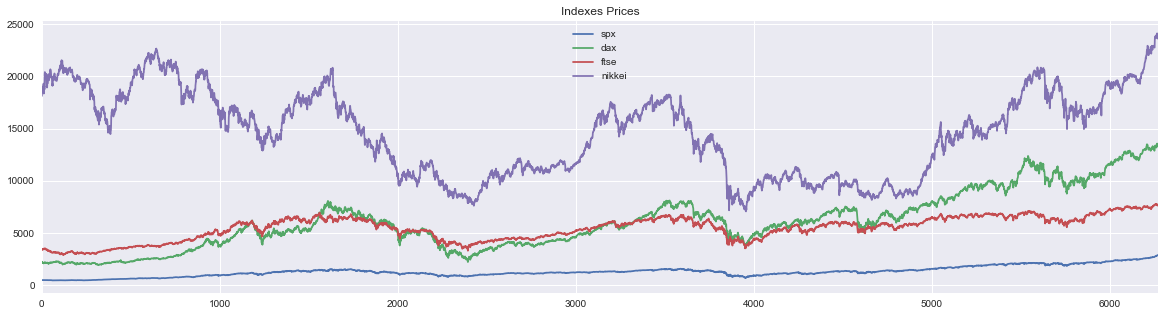

In [68]:
plt.figure(figsize=(20,5))
df_complete.spx.plot()
df_complete.dax.plot()
df_complete.ftse.plot()
df_complete.nikkei.plot()
plt.title('Indexes Prices')
plt.legend(df_complete.columns[1:])

Much better, don't you think?

Now let's use another plot, named QQ Plot, which compares two probability distributions by plotting their quantiles against each other

In [69]:
import scipy.stats
import pylab

((array([-3.69357572, -3.46171913, -3.33410335, ...,  3.33410335,
          3.46171913,  3.69357572]),
  array([ 438.92    ,  441.49    ,  441.96    , ..., 2839.253031,
         2853.528411, 2872.867839])),
 (476.4605610284118, 1288.1275420815123, 0.9767273150948814))

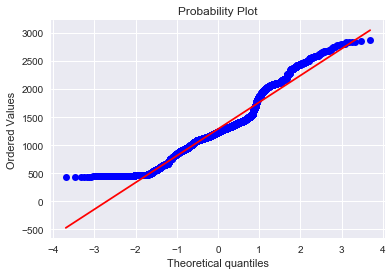

In [70]:
scipy.stats.probplot(df_complete.spx,plot=pylab)

We can see that data doesn't follow a normal distribution. Take a look the amount of data around 500 mark.

((array([-3.69357572, -3.46171913, -3.33410335, ...,  3.33410335,
          3.46171913,  3.69357572]),
  array([ 1911.7 ,  1914.69,  1918.85, ..., 13468.79, 13478.86, 13559.6 ])),
 (2691.2973657366406, 6080.063362577764, 0.9766497540124158))

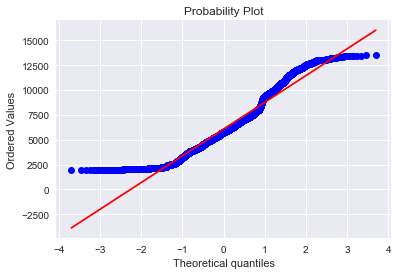

In [71]:
scipy.stats.probplot(df_complete.dax,plot=pylab)

((array([-3.69357572, -3.46171913, -3.33410335, ...,  3.33410335,
          3.46171913,  3.69357572]),
  array([2876.6     , 2899.9     , 2909.      , ..., 7762.941268,
         7769.139189, 7778.637689])),
 (1126.0991088822113, 5422.713545304514, 0.9825441776412113))

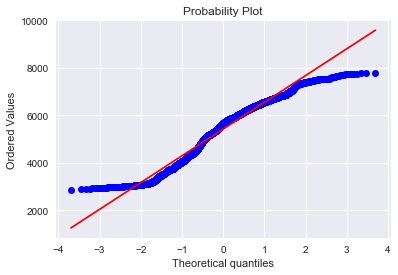

In [72]:
scipy.stats.probplot(df_complete.ftse,plot=pylab)

((array([-3.69357572, -3.46171913, -3.33410335, ...,  3.33410335,
          3.46171913,  3.69357572]),
  array([ 7054.98,  7086.03,  7162.9 , ..., 23940.78, 23951.81, 24124.15])),
 (3950.0238127285347, 14597.055699633114, 0.9765192057833383))

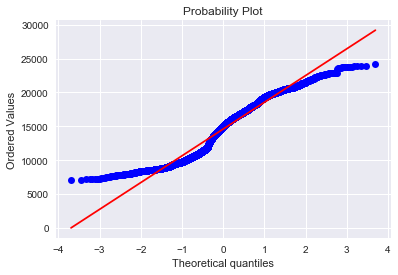

In [73]:
scipy.stats.probplot(df_complete.nikkei,plot=pylab)

Same explanation for other indexes.

Next step is to convert dataframe in Time Series. See you in the next notebook.